# PGM Homework 1 

# Linear classification

### 1- LDA model

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def pi(y):
    return np.sum(y)/len(y)
def mu(x,y):
    m=np.sum(y)
    s_0=0
    s_1=0
    for i in range(len(x)):
        if y[i]==0:
            s_0+=x[i]
        else:
            s_1+=x[i]
    mu_0=s_0/m
    mu_1=s_1/m
    return mu_0,mu_1
def sigma(x,y):
    mu_0,mu_1=mu(x,y)
    s=0
    for i in range(len(x)):
        mu_k= mu_0 if y[i]==0 else mu_1
        s+=np.dot((x[i]-mu_k).reshape(2,1),((x[i]-mu_k).reshape(2,1)).T)
    return s/len(x)
def p_y(y,p_):
    return p_**y * (1-p_)**(1-y)
def p_x_y(x,mu,sigma):
    return np.exp(-0.5*np.dot(np.dot((x-mu).reshape(2,1).T,np.linalg.inv(sigma)),(x-mu).reshape(2,1)))/(2*np.pi*(np.linalg.det(sigma)**(1/2)))
def py_px(x,pi,mu,sigma):
    return (p_x_y(x,mu_1,sigma)*pi)/(p_x_y(x,mu_1,sigma)*pi+p_x_y(x,mu_0,sigma)*(1-pi))
def accuracy(y, y_pred):
    return (y == y_pred).sum()/len(y)
def error(y, y_pred):
    return np.round((y != y_pred).sum()/len(y),decimals=3)

In [46]:
class LDA():
    def __init__(self):
        self.pi_= None
        self.mu_0 = None
        self.mu_1 = None
        self.sigma_= None
        self.beta = None
        self.gamma = None

    def fit(self,x,y):
        self.pi_=pi(y_train)
        self.mu_0,self.mu_1=mu(x_train,y_train)
        self.sigma_=sigma(x_train,y_train)
        self.beta=np.dot((self.mu_1-self.mu_0).T,np.linalg.inv(self.sigma_))
        mu_00=np.dot(np.dot(self.mu_0.T,np.linalg.inv(self.sigma_)),self.mu_0)
        mu_11=np.dot(np.dot(self.mu_1.T,np.linalg.inv(self.sigma_)),self.mu_1)
        self.gamma = .5*(mu_00-mu_11)+np.log(self.pi_/(1-self.pi_))
        
    def predict_proba(self,x_test):
        n=x_test.shape[0]
        y_proba = np.zeros((n,  2))
        A=self.gamma + np.dot(x_test, self.beta.T)
        y_proba[:, 1] = self.sigmoid(A)# 1/(1+np.exp(-A))
        y_proba[:, 0] = 1 - y_proba[:, 1]
        return y_proba
    
    def predict(self,x_test):
        y_proba = self.predict_proba(x_test)
        y_pred = np.argmax(y_proba, axis = 1)
        return y_pred
    
    def pi(self,y):
        return np.sum(y)/len(y)
    
    def mu(self,x,y):
        m=np.sum(y)
        s_0=0
        s_1=0
        for i in range(len(x)):
            if y[i]==0:
                s_0+=x[i]
            else:
                s_1+=x[i]
        mu_0=s_0/m
        mu_1=s_1/m
        return mu_0,mu_1
    
    def sigma(self,x,y):
        mu_0,mu_1=mu(x,y)
        s=0
        for i in range(len(x)):
            mu_k= mu_0 if y[i]==0 else mu_1
            s+=np.dot((x[i]-mu_k).reshape(2,1),((x[i]-mu_k).reshape(2,1)).T)
        return s/len(x)
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def func(self,x,mu_0,mu_1,sigma_,pi_):
        a1=np.dot((mu_0-mu_1).reshape(2,1).T,np.linalg.inv(sigma_))[0,0]
        a2=np.dot((mu_0-mu_1).reshape(2,1).T,np.linalg.inv(sigma_))[0,1]
        mu_0=mu_0.reshape(2,1)
        mu_1=mu_1.reshape(2,1)
        mu_00=np.dot(np.dot(mu_0.T,np.linalg.inv(sigma_)),mu_0)
        mu_11=np.dot(np.dot(mu_1.T,np.linalg.inv(sigma_)),mu_1)
        return (np.log(pi_/(1-pi_)) +.5*(mu_00-mu_11) - a1*x )/a2
    def plot(self,data_test,title):
        scatter_x = data_test.x_1.values
        scatter_y = data_test.x_2.values
        group = data_test.label.values
    #     group = results.predicted.apply(lambda x : 1 if x>0.5 else 0).values
        cdict = {0: 'green', 1: 'blue'}

        fig, ax = plt.subplots(figsize=(8,8))
        for g in np.unique(group):
            ix = np.where(group == g)
            ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 10)
    #     data_test.plot.scatter('x_1','x_2',c='label',colormap=["r","b"])
        x=np.arange(np.min(scatter_x),np.max(scatter_x),0.01)
        y=np.array([self.func(x[i],self.mu_0,self.mu_1,self.sigma_,self.pi_) for i in range (len(x))])    

        plt.plot(x.reshape(1,x.shape[0])[0],y.reshape(1,x.shape[0])[0],c='r',label='p(y=1|x)=0.5')
        plt.legend()
        plt.title(title)
        plt.show()

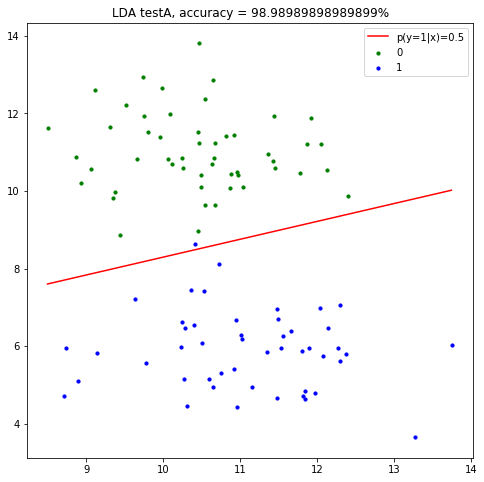

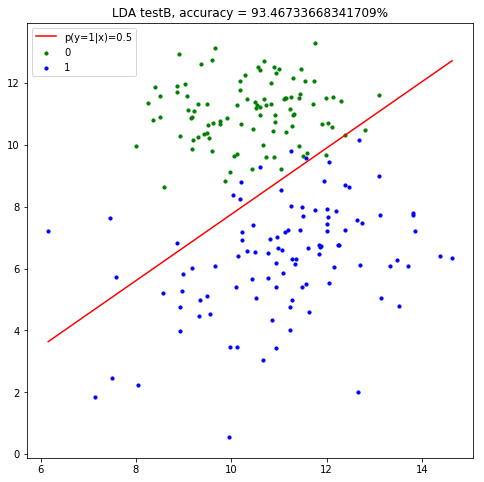

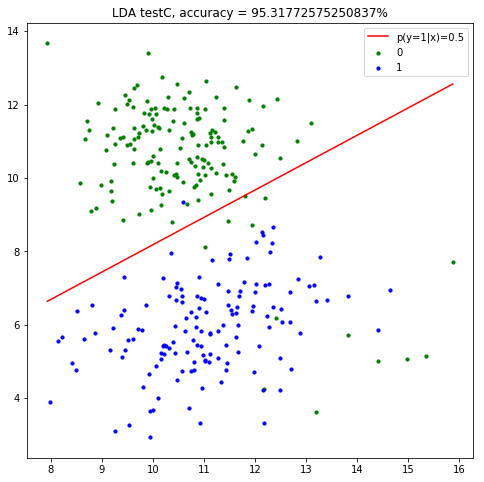

In [47]:
#Loading data
for l in ["A","B","C"]:
    data=pd.read_csv("train"+l+".txt",sep=' ',header=-1)
    data.columns=["x_1","x_2","label"]
    x_train=np.array(data[["x_1","x_2"]])
    y_train=np.array(data['label'])

    data_test=pd.read_csv("test"+l+".txt",sep=' ')
    data_test.columns=["x_1","x_2","label"]
    x_test=np.array(data_test[["x_1","x_2"]])
    y_test=np.array(data_test['label'])
    model=LDA()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    data_test["prediction"]=y_pred
    model.plot(data_test,"LDA test"+l+", accuracy = {}%".format(accuracy(y_test,y_pred)*100))

### 2- Logistic regression

In [48]:
train=[pd.read_csv('train'+i,sep=" ",header=None) for i in 'ABC']
test=[pd.read_csv('test'+i,sep=" ",header=None) for i in 'ABC']

In [49]:
from scipy.optimize import minimize
class LogisticRegression():
    def __init__(self):
        self.w=None
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    def etha(self,w,x):
        return self.sigmoid(np.dot(w.T,x))
    def log_likelihood(self,w, x, y):
        return y*np.dot(w.T,x)+np.log(self.sigmoid(-np.dot(w.T,x)))
    def Grad_l(self,w,x,y):
        return(y-self.etha(w,x))*x

    def fit(self,X,y):
        def sample_neg_logl(w,X,Y):
            l=[0]
            for i,x in enumerate(X) : 
                l+=-self.log_likelihood(w,x,Y[i])
            return l 
        def sample_neg_gradlogl(w,X,Y):
            l=[0,0,0]
            for i,x in enumerate(X) : 
                l+=-self.Grad_l(w,x,Y[i])
            return l  
        X = np.c_[np.ones((X.shape[0], 1)), X]
        y = y[:, np.newaxis]
        w0=np.zeros((X.shape[1], 1))
        self.w=minimize(sample_neg_logl,w0,args=(X,y),method='BFGS',jac=sample_neg_gradlogl).x
    
    def predict(self, X):
        n,p = X.shape
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return np.where(np.dot(X, self.w) >= 0, 1 , 0)
    
    def plot(self,data_test,title):
        scatter_x = data_test.x_1.values
        scatter_y = data_test.x_2.values
        group = data_test.label.values
    #     group = results.predicted.apply(lambda x : 1 if x>0.5 else 0).values
        cdict = {0: 'green', 1: 'blue'}

        fig, ax = plt.subplots(figsize=(8,8))
        for g in np.unique(group):
            ix = np.where(group == g)
            ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 10)
    #     data_test.plot.scatter('x_1','x_2',c='label',colormap=["r","b"])
        x=np.arange(np.min(scatter_x),np.max(scatter_x),0.01)
        y=np.array([-self.w[1]*xi/self.w[2]-self.w[0]/self.w[2] for xi in x])

        plt.plot(x.reshape(1,x.shape[0])[0],y.reshape(1,x.shape[0])[0],c='r',label='p(y=1|x)=0.5')
        plt.legend()
        plt.title(title)
        plt.show()

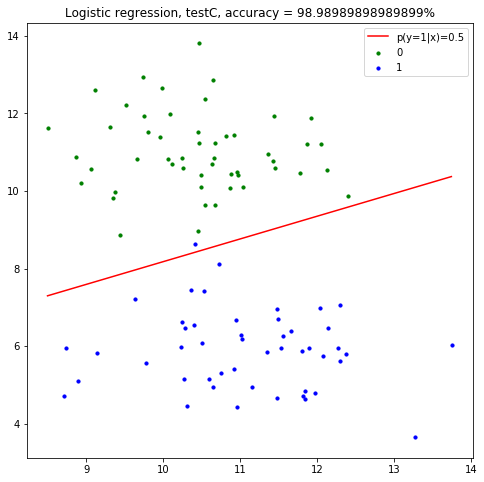

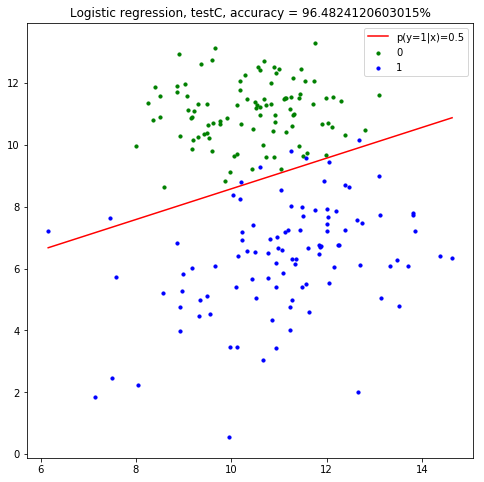

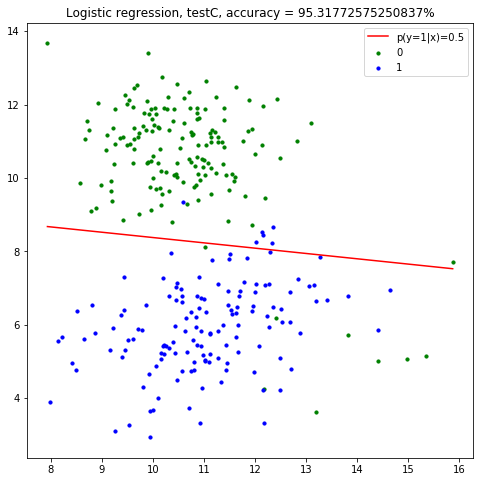

In [50]:
for i in range (3):
    A_train=train[i]
    # X = feature values, all the columns except the last column
    X = A_train.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = A_train.iloc[:, -1]

    class_1 = A_train.loc[y == 1]
    class_0 = A_train.loc[y == 0]
    model=LogisticRegression()
    
    model.fit(X,y)
    seq="ABC"
    data_test=pd.read_csv("test"+seq[i]+".txt",sep=' ')
    data_test.columns=["x_1","x_2","label"]
    y_pred = model.predict(data_test[["x_1","x_2"]])
    model.plot(data_test,"Logistic regression, test"+l+", accuracy = {}%".format(accuracy(data_test["label"],y_pred)*100))
    

### 3- Linear regression

In [51]:
class LinearRegression():
    """
    Description
    -----------
    Class of a pure linear regression without any regularization    
    
    Parameters:
    -----------
    weights : the weights of our model        
    
    """
    def __init__(self):
        
        self.w = None 

    def fit(self, X, y):
        """
        Description
        -----------
        fit on training observations
        
        Parameters:
        -----------
        X : (n, p) np.array, training data matrix
        Y : (n, ) np.array, training labels
        
        """

        n,p = X.shape
        X = np.c_[np.ones((X.shape[0], 1)), X]
        self.w = np.dot(np.linalg.pinv(X), y)

        return self.w

    def predict(self, X):
        """
        Description
        -----------
        Predict on new observations
        
        Parameters:
        -----------
        X : (n, p) np.array, new data matrix
        """
        n,p = X.shape
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return np.where(np.dot(X, self.w)>=0.5, 1,0)
    
    def plot(self,data_test,title):
        scatter_x = data_test.x_1.values
        scatter_y = data_test.x_2.values
        group = data_test.label.values
    #     group = results.predicted.apply(lambda x : 1 if x>0.5 else 0).values
        cdict = {0: 'green', 1: 'blue'}

        fig, ax = plt.subplots(figsize=(8,8))
        for g in np.unique(group):
            ix = np.where(group == g)
            ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 10)
    #     data_test.plot.scatter('x_1','x_2',c='label',colormap=["r","b"])
        x=np.arange(np.min(scatter_x),np.max(scatter_x),0.01)
        y=np.array([-self.w[1]*xi/self.w[2]-self.w[0]/self.w[2]+0.5/self.w[2] for xi in x])

        plt.plot(x.reshape(1,x.shape[0])[0],y.reshape(1,x.shape[0])[0],c='r',label='p(y=1|x)=0.5')
        plt.legend()
        plt.title(title)
        plt.show()

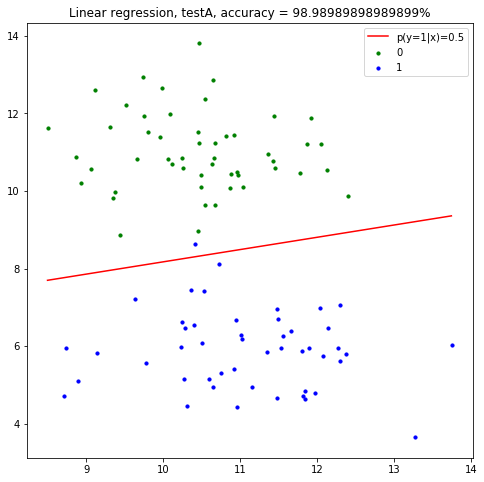

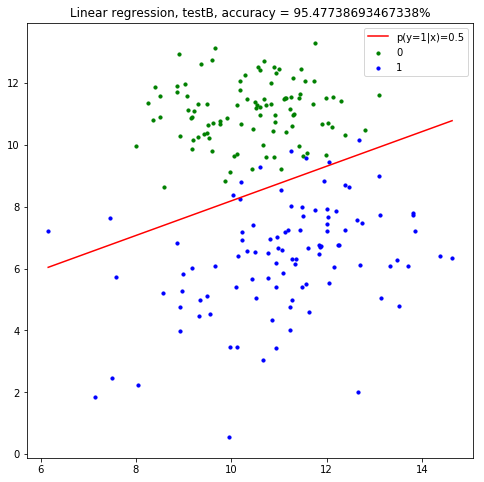

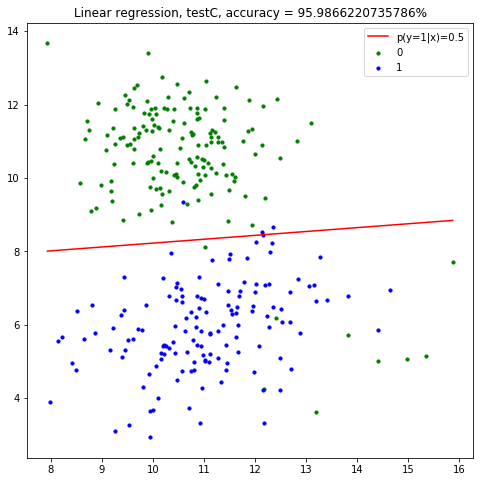

In [52]:
for i in range (3):
    A_train=train[i]
    # X = feature values, all the columns except the last column
    X = A_train.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = A_train.iloc[:, -1]

    class_1 = A_train.loc[y == 1]
    class_0 = A_train.loc[y == 0]
    model=LinearRegression()
    
    model.fit(X,y)
    seq="ABC"
    data_test=pd.read_csv("test"+seq[i]+".txt",sep=' ')
    data_test.columns=["x_1","x_2","label"]
    y_pred = model.predict(data_test[["x_1","x_2"]])
    model.plot(data_test,"Linear regression, test"+seq[i]+", accuracy = {}%".format(accuracy(data_test["label"],y_pred)*100))
    

### 4- Application

In [53]:
models=[LDA(),LogisticRegression(),LinearRegression()]
y_preds={"LDA_train_error":[],"LDA_test_error":[],"Logistic_train_error":[],"Logistic_test_error":[],"Linear_train_error":[],"Linear_test_error":[]}
models_=["LDA","Logistic","Linear"]
for i in range(3):
    seq="ABC"
    A_train=train[i]
    # X = feature values, all the columns except the last column
    X = A_train.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = A_train.iloc[:, -1]
    data_test=pd.read_csv("test"+seq[i]+".txt",sep=' ')
    class_1 = A_train.loc[y == 1]
    class_0 = A_train.loc[y == 0]
    
    for j in range(3):
        model=models[j]
        model.fit(X,y)
        seq="ABC"
        data_test.columns=["x_1","x_2","label"]
        y_pred = model.predict(data_test[["x_1","x_2"]])
        y_pred_train = model.predict(X)
        y_preds[models_[j]+"_test_error"].append(error(data_test["label"],y_pred))
        y_preds[models_[j]+"_train_error"].append(error(y,y_pred_train))
#     model.plot(data_test,"Linear regression, test"+seq[i]+", accuracy = {}%".format(accuracy(data_test["label"],y_pred)*100))


In [54]:
y_preds

{'LDA_train_error': [0.0, 0.02, 0.05],
 'LDA_test_error': [0.02, 0.035, 0.047],
 'Logistic_train_error': [0.0, 0.01, 0.03],
 'Logistic_test_error': [0.01, 0.035, 0.047],
 'Linear_train_error': [0.0, 0.02, 0.027],
 'Linear_test_error': [0.01, 0.045, 0.04]}

The missclassification error is obviously larger in the test dataset than in the train since the model in all the cases has never seen those test datapoints. The results above show that the error is quite similar for the three algorithms, but still LDA and Logistic regression are better in inferring test_B.

### 5- QDA model

In [55]:
class QDA:
    
    def __init__(self):
        
        """
        Attributes
        -----------
        pi : float, Bernoulli parameter p(y = 1)
        mu_0 : (p,) np.array, mean of X|{y = 0}
        mu_1 : (p,) np.array, mean of X|{y = 1}
        Sigma : (p, p) np.array, shared covariance matrix of X|{y = 0} and X|{y = 1}
        a : float
        b : (p,) np.array
        
        Note
        -----------
        p : int, space dimension of the data
        a & b: Logistic parameters We get when computing the MLE.
        """
        self.pi = None
        self.mu_0 = None
        self.mu_1 = None
        self.Sigma_0 = None
        self.Sigma_1 = None
        self.a = None
        self.b = None
        self.c = None
        
    def fit(self, X, y):
        """
        Description
        -----------
        Update the attributes
        
        Parameters
        -----------
        X : (n, p) np.array, data matrix
        y : (n,) np.array, labels in {0, 1}
        """
        n = X.shape[0] # Number of observations

        sum_1 = np.sum(y) # Number of observations of class 1
        sum_0 = n - sum_1   # Number of observations of class 0

        self.pi = sum_1/n       # The estimated parameter pi
        self.mu_1 = np.dot(X.T, y)/sum_1
        self.mu_0 =np.dot(X.T, (1 - y))/sum_0
        self.Sigma_1 = np.dot((X - self.mu_1).T, y[:,np.newaxis]*(X - self.mu_1))/sum_1
        self.Sigma_0 = np.dot((X - self.mu_0).T, (1 - y)[:,np.newaxis]*(X - self.mu_1))/sum_0
        Precision_1 = np.linalg.inv(self.Sigma_1)
        Precision_0 = np.linalg.inv(self.Sigma_0)
        self.a = -(np.dot(self.mu_1.T, np.dot(Precision_1, self.mu_1)) - np.dot(self.mu_0.T, np.dot(Precision_0, self.mu_0)))/2 + np.log(self.pi/(1 - self.pi)) + np.log(np.linalg.det(Precision_1)/np.linalg.det(Precision_0))/2
        self.b = np.dot(Precision_1, self.mu_1) - np.dot(Precision_0, self.mu_0)
        self.c = (Precision_0 - Precision_1)/2
        
    def predict_proba(self, X):
        """
        Description
        -----------
        Compute the probabilities p(y = 0|X) and p(y = 1|X)
        
        Parameters
        -----------
        X : (n, p) np.array, data matrix
        
        Returns
        -----------
        y_proba : (n, 2) np.array, 1st column p(y = 0|X) and 2nd column p(y = 1|X)
        
        """
        n = X.shape[0]
        y_proba = np.zeros((n,  2))
        y_proba[:, 1] = sigmoid(self.a + np.dot(X, self.b) + np.sum(np.dot(X, self.c)*X, axis = 1))
        y_proba[:, 0] = 1 - y_proba[:, 1]
        return y_proba
    
    def predict(self, X):
        """
        Description
        -----------
        Compute the labels
        
        Parameters
        -----------
        X : (n, p) np.array, data matrix
        
        Returns
        -----------
        y_pred: (n,) np.array, predicted labels of data matrix X
        
        """
        y_proba = self.predict_proba(X)
        y_pred = np.argmax(y_proba, axis = 1)
        return y_pred
    
    def plot_line(self, X, y, title = "QDA", save = False, path = "" , x_label = ""):
        """
        Description
        -----------
        Scatter plot of data X along with plotting the line p(y=1|X) = 0.5
        
        Parameters:
        -----------
        X : (n, p) np.array, data matrix
        y : (n,) np.array, labels in {0, 1}
        """
        plt.scatter(X[y == 0, 0], X[y == 0, 1], c = "b")
        plt.scatter(X[y == 1, 0], X[y == 1, 1], c = "r")
        plt.title(title)
        plt.xlabel(x_label)
        x, y = np.meshgrid(np.linspace(X[:, 0].min() - 5, X[:, 0].max() + 5, 100), np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5, 100))
        z = self.a + self.b[0]*x + self.b[1]*y + self.c[0, 0]*(x**2) + (self.c[0, 1] + self.c[1, 0])*x*y + self.c[1, 1]*(y**2)
        plt.ylim((X[:, 1].min() - 2, X[:, 1].max() + 2))
        plt.contour(x, y, z, 0)
        plt.contourf(x, y, z, 0, cmap = plt.cm.inferno, alpha = 0.5)
        if save:
            plt.savefig(path)
        
def plots(class_):
    """
    Description
    -------------
    This function plots the training and test data points along with the line p(y=1|x) = 0.5 for every model.
    
    Parameters
    -------------
    class_ : a class_s, LDA, QDA, LogisticRegression or LinearRegression.
    """
    plt.figure(figsize = (20, 10))
    plt.subplots_adjust(hspace = 0.5)
    plt.subplot(2, 3, 1)
    model = class_()
    model.fit(X_A, y_A)
    model.plot_line(X_A, y_A, title = "Training A : error = %.4f" %error(y_A, model.predict(X_A)) )

    plt.subplot(2, 3, 2)
    model = class_()
    model.fit(X_B, y_B)
    model.plot_line(X_B, y_B, title = "Training B : error = %.4f" %error(y_B, model.predict(X_B)) )

    plt.subplot(2, 3, 3)
    model = class_()
    model.fit(X_C, y_C)
    model.plot_line(X_C, y_C, title = "Training C : error = %.4f" %error(y_C, model.predict(X_C)) )

    plt.subplot(2, 3, 4)
    model = class_()
    model.fit(X_A, y_A)
    model.plot_line(X_A_test, y_A_test, title = "Test A : error = %.4f" %error(y_A_test, model.predict(X_A_test)) )

    plt.subplot(2, 3, 5)
    model = class_()
    model.fit(X_B, y_B)
    model.plot_line(X_B_test, y_B_test, title = "Test B : error = %.4f" %error(y_B_test, model.predict(X_B_test)) )

    plt.subplot(2, 3, 6)
    model = class_()
    model.fit(X_C, y_C)
    model.plot_line(X_C_test, y_C_test, title = "Test C : error = %.4f" %error(y_C_test, model.predict(X_C_test)) )

    plt.show()

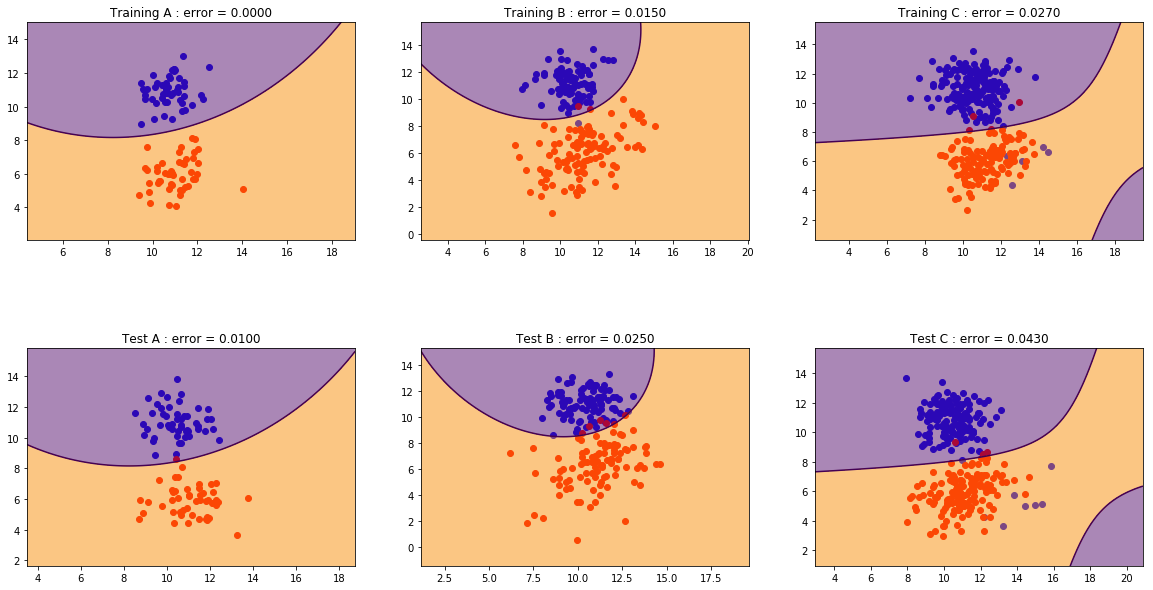

In [56]:
train = pd.read_csv('trainA',sep = " ").values
X_A = train[:, 0:2]
y_A = train[:, 2]

train = pd.read_csv('trainB',sep = " ").values
X_B = train[:, 0:2]
y_B = train[:, 2]

train = pd.read_csv('trainC',sep = " ").values
X_C = train[:, 0:2]
y_C = train[:, 2]

# Loading test data
test = pd.read_csv('testA',sep = " ").values
X_A_test = test[:, 0:2]
y_A_test = test[:, 2]

test = pd.read_csv('testB',sep = " ").values
X_B_test = test[:, 0:2]
y_B_test = test[:, 2]

test = pd.read_csv('testC',sep = " ").values
X_C_test = test[:, 0:2]
y_C_test = test[:, 2]
plots(QDA)

We see that QDA outperforms the previous classification algorithms in both test_A and test_B. But, it didn't work well or improve previous results on test_C since it's sensitive to outliers.